In [16]:
import kmapper as km
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import kmapper.evaluate as evaluate

D_Mapper(verbose=1)
Mapping on data shaped (10000, 2) using lens shaped (10000,)



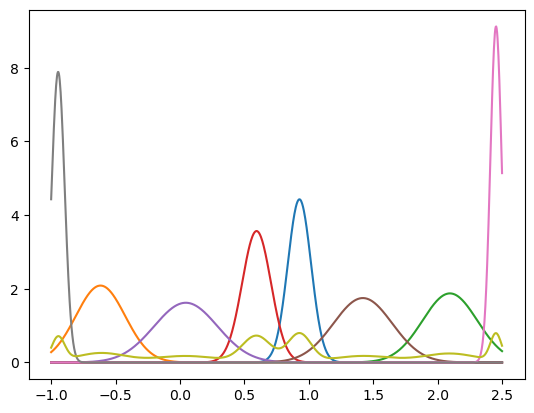

 - Cover - centers: [-0.9456629980301314, -0.6168725687174486, 0.04524169279637508, 0.5945960586692384, 0.9273811213338923, 1.4194622794768343, 2.0953889705554296, 2.453144510099674]
inner_range: [3.06249957]
radius: [0.08629095155743977, 0.32609028791845773, 0.4199381167801103, 0.1908008534214899, 0.15371471112041774, 0.38928240647341894, 0.36299170017695404, 0.07460899899305318]
bic:22298.232521196
alpha_max:0.09
Creating 8 hypercubes.

Created 13 edges and 12 nodes in 0:00:21.612307.


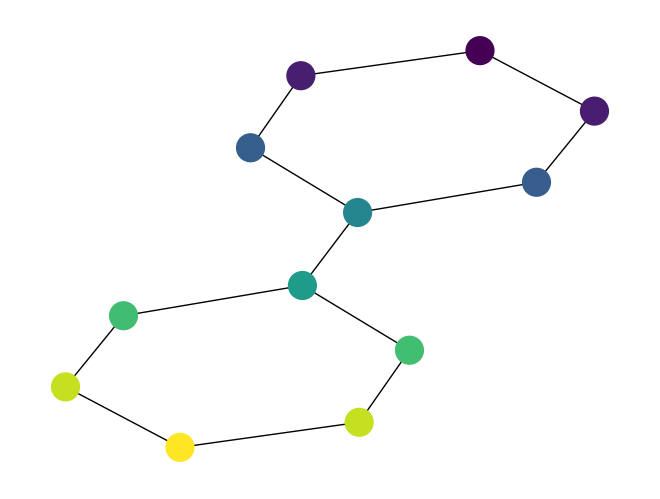

100%|██████████| 100/100 [01:28<00:00,  1.12it/s]


SC:0.279128731743
SC_norm:0.6395643658715
TSR:1.0
SC_adj:0.81978218293575


In [17]:
n = 8
#a = 0.08818
a = 0.088

data = np.loadtxt("two_insert_cir.csv",delimiter=",")
projected_data = data[:,0]

mapper = km.D_Mapper(verbose=1)

cover = km.D_Cover(n_cubes=n,alpha = a,verbose=1,tol = 12*1e-4,max_iter=5000000, n_init=100)

graph = mapper.map(projected_data, data, cover=cover)
interval_table_1 = cover.interval_table

color_list1 = []
for i in range(len(graph['nodes'])):
    index_list = [l for l in graph['nodes'].values()][i]
    color = np.mean(projected_data[index_list])
    color_list1.append(color)
G1 = km.adapter.to_networkx(graph) 
nx.draw(G1, pos=nx.kamada_kawai_layout(G1), node_color=color_list1, node_size =400)
plt.show()

SC_adj = evaluate.compute_SC_adj(data, projected_data, graph
                                 , Cover = km.D_Cover(n_cubes=n,alpha = a,verbose=0, tol = 12*1e-4,max_iter=3000000)
                                 , type = 'd')
                                 


KeplerMapper(verbose=1)
Mapping on data shaped (10000, 2) using lens shaped (10000,)

Creating 8 hypercubes.

Created 13 edges and 12 nodes in 0:00:00.067665.


/tmp/ipykernel_29055/929289727.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  interval_table_2[0,i] = s
/tmp/ipykernel_29055/929289727.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  interval_table_2[1,i] = s + x


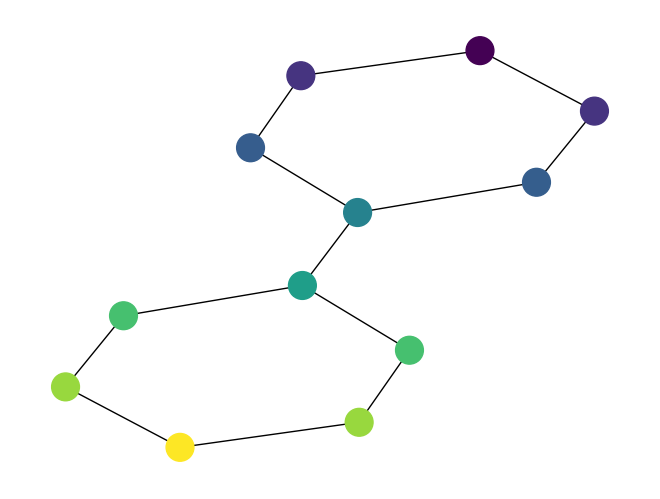

100%|██████████| 100/100 [00:06<00:00, 15.58it/s]


SC:0.150797968006
SC_norm:0.575398984003
TSR:1.0
SC_adj:0.7876994920015


In [18]:
n = 8
a = 0.02
mapper = km.KeplerMapper(verbose=1)
cover = km.Cover(n_cubes=n,perc_overlap=a)
graph = mapper.map(projected_data, data, cover=cover)

interval_table_2 = np.zeros((2,n))  
s = cover.bounds_[0]
L = cover.bounds_[1] - cover.bounds_[0]
x = L/(n-(n-1)*a)
for i in range(n):
    interval_table_2[0,i] = s
    interval_table_2[1,i] = s + x
    s = s + (1 - a )*x
    
color_list2 = []
for i in range(len(graph['nodes'])):
    index_list = [l for l in graph['nodes'].values()][i]
    color = np.mean(projected_data[index_list])
    color_list2.append(color)
G2 = km.adapter.to_networkx(graph)
nx.draw(G2, pos=nx.kamada_kawai_layout(G2), node_color=color_list2, node_size =400)
plt.savefig('2ic.png')
plt.show()

SC_adj = evaluate.compute_SC_adj(data, projected_data, graph, cover, type = 'k')

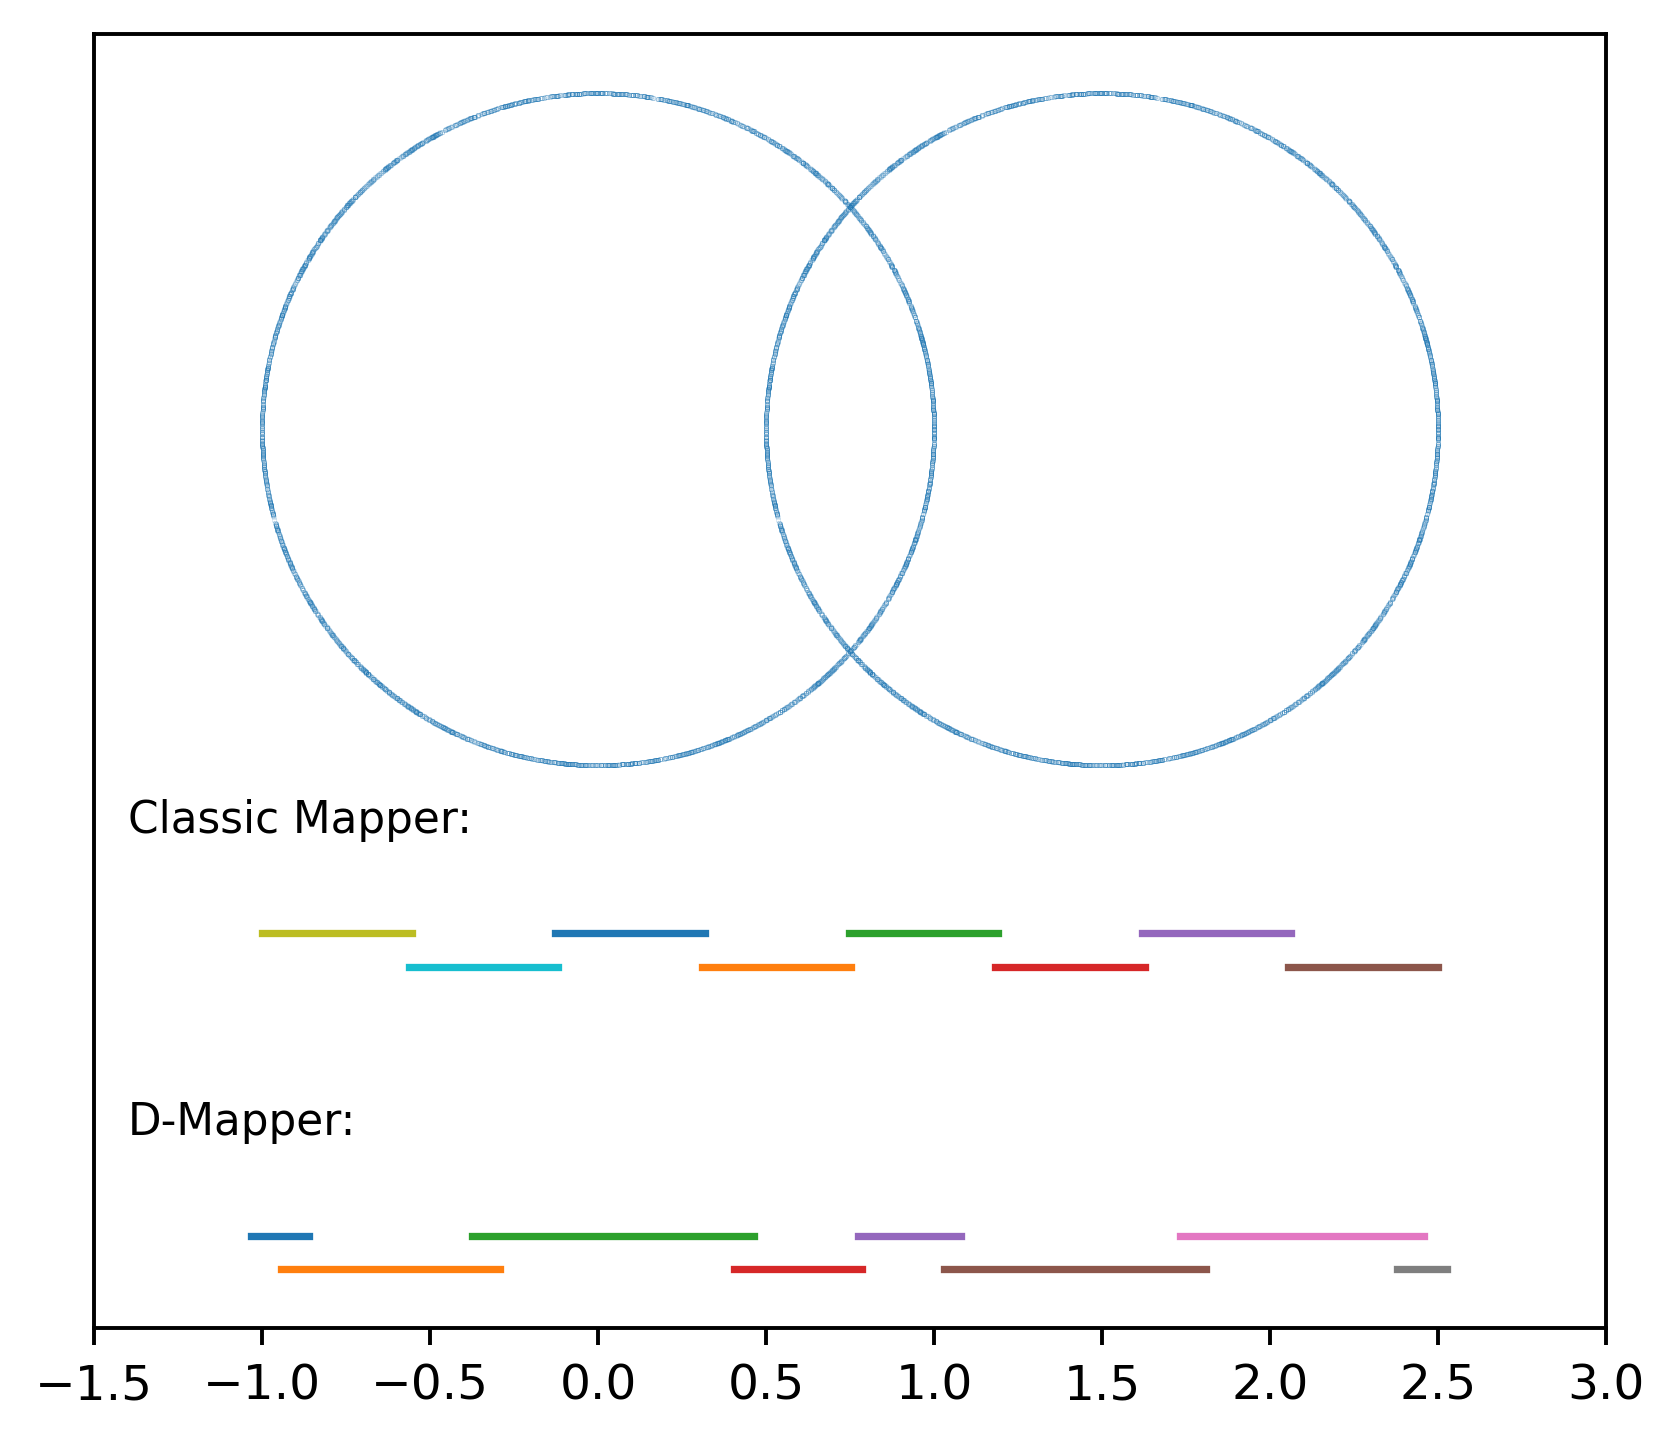

In [19]:
plt.figure(dpi=350)
#G_mapper interval
for i in range(1,interval_table_1.shape[1]+1):
    plt.plot([interval_table_1[0,i-1],interval_table_1[1,i-1]],[0.1*(i % 2)-2.5,0.1*(i%2)-2.5])

#mapper interval
for i in range(1,interval_table_2.shape[1]+1):
    plt.plot([interval_table_2[0,i-1],interval_table_2[1,i-1]],[0.1*(i % 2)-1.6,0.1*(i%2)-1.6])

plt.scatter(data[:,0],data[:,1],s=0.001)

plt.text(-1.4, -2.1, 'D-Mapper:', fontsize=9) 
plt.text(-1.4, -1.2, 'Classic Mapper:', fontsize=9) 

ax = plt.gca()
ax.set_aspect(1)
plt.xlim((-1.5, 3))
plt.yticks([])
#plt.savefig("interval_fig2.jpg",dpi=350, bbox_inches='tight')
plt.savefig("interval_fig2.eps", bbox_inches='tight')
plt.show()

D_Mapper(verbose=1)
Mapping on data shaped (10000, 2) using lens shaped (10000,)

Creating 8 hypercubes.

Created 12 edges and 12 nodes in 0:00:02.502876.


100%|██████████| 100/100 [03:07<00:00,  1.87s/it]


SC:0.324927207124
SC_norm:0.662463603562
TSR:0.5
SC_adj:0.581231801781


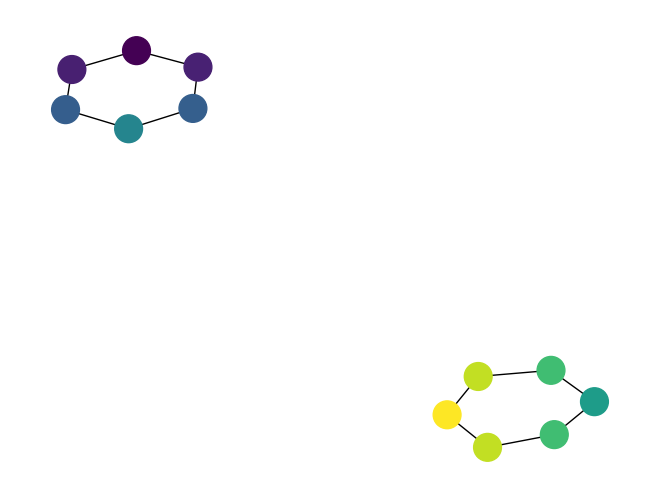

In [24]:
n = 8
a = 0.12
data = np.loadtxt("two_insert_cir.csv",delimiter=",")
projected_data = data[:,0]

mapper = km.D_Mapper(verbose=1)
cover = km.D_Cover(n_cubes=n,alpha = a,verbose=0, max_iter=200000, n_init=10,tol = 12*1e-4)
graph = mapper.map(projected_data, data, cover=cover)   

SC_adj = evaluate.compute_SC_adj(data, projected_data, graph, 
                                 Cover = cover
                                 ,type = 'd')

color_list3 = []
for i in range(len(graph['nodes'])):
    index_list = [l for l in graph['nodes'].values()][i]
    color = np.mean(projected_data[index_list])
    color_list3.append(color)
G3 = km.adapter.to_networkx(graph)
nx.draw(G3, pos=nx.spring_layout(G3), node_color=color_list3, node_size =400)
plt.show()


KeplerMapper(verbose=1)
Mapping on data shaped (10000, 2) using lens shaped (10000,)

Creating 8 hypercubes.

Created 12 edges and 12 nodes in 0:00:00.074139.


100%|██████████| 100/100 [00:06<00:00, 15.94it/s]


SC:0.154385181057
SC_norm:0.5771925905285
TSR:0.25
SC_adj:0.41359629526425


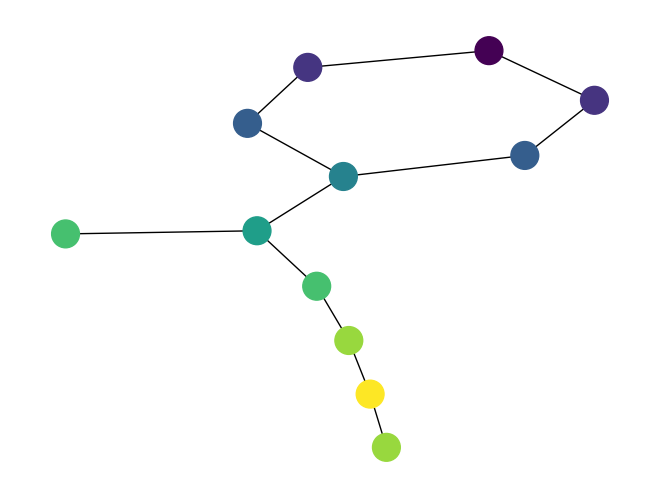

In [21]:
n = 8
a = 0.005
mapper = km.KeplerMapper(verbose=1)
cover = km.Cover(n_cubes=n,perc_overlap=a)
graph = mapper.map(projected_data, data, cover=cover)

SC_adj = evaluate.compute_SC_adj(data, projected_data, graph, 
                                 Cover = cover
                                 ,type = 'k')

color_list4 = []
for i in range(len(graph['nodes'])):
    index_list = [l for l in graph['nodes'].values()][i]
    color = np.mean(projected_data[index_list])
    color_list4.append(color)
G4 = km.adapter.to_networkx(graph)
nx.draw(G4, pos=nx.kamada_kawai_layout(G4), node_color=color_list4, node_size =400)
plt.show()

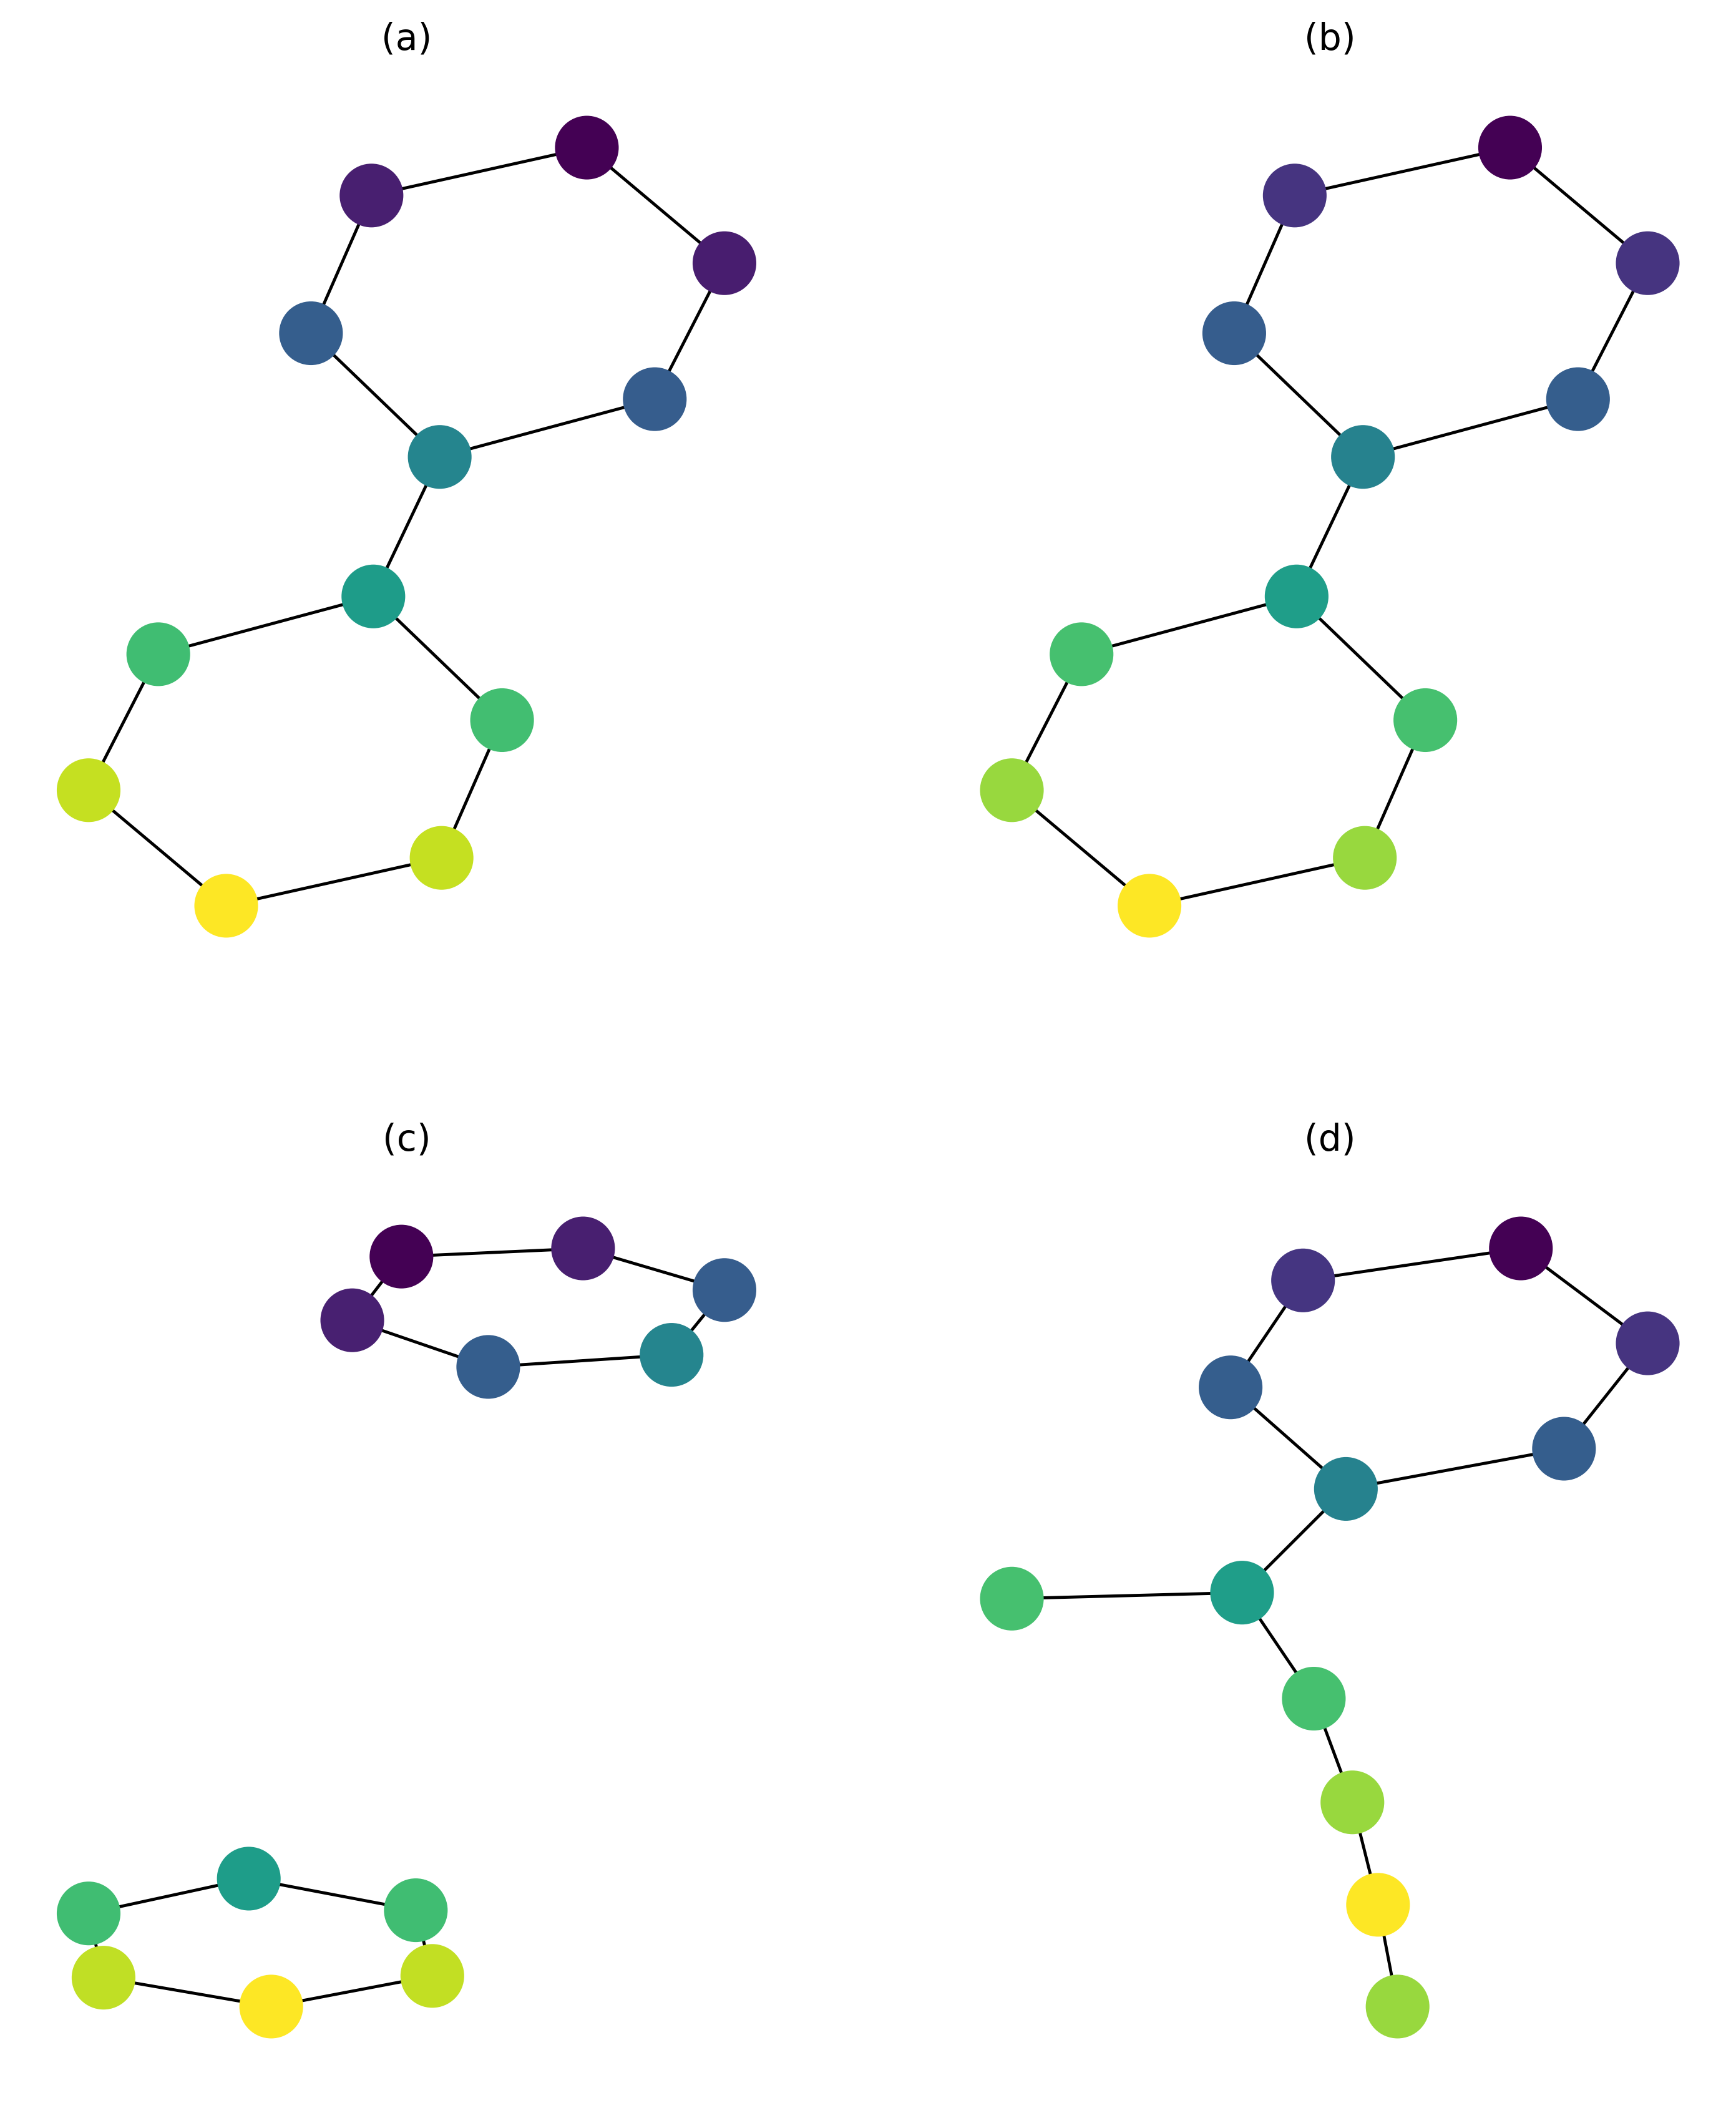

In [23]:
fig = plt.figure(figsize=(10, 12),dpi=350)
grid = plt.GridSpec(2, 2, figure=fig)
# row one
plt.subplot(grid[0,0])
nx.draw(G1, pos=nx.kamada_kawai_layout(G1), node_color=color_list1, node_size =400)
plt.plot()
plt.title('(a)')

plt.subplot(grid[0,1])
nx.draw(G2, pos=nx.kamada_kawai_layout(G2), node_color=color_list2, node_size =400)
plt.plot()
plt.title('(b)')

# row two
plt.subplot(grid[1,0])
nx.draw(G3, pos=nx.spring_layout(G3), node_color=color_list3, node_size =400)
plt.plot()
plt.title("(c)")

plt.subplot(grid[1,1])
nx.draw(G4, pos=nx.kamada_kawai_layout(G4), node_color=color_list4, node_size =400)
plt.plot()
plt.title('(d)')

#plt.savefig("two_i_cir.jpg",dpi=350,bbox_inches='tight')
plt.savefig("two_i_cir.eps", bbox_inches='tight')
plt.show()